I used this script to experiment how to extract vehicle data from MS COCO
datasets.

Reference:
https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb

In [1]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [2]:
dataDir='/data/COCO'
dataType='train2017'
#dataType='val2017'
#dataType='train2014'
#dataType='val2014'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [3]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=34.90s)
creating index...
index created!


In [4]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
#nms=[cat['name'] for cat in cats]
#print('COCO categories: \n{}\n'.format(' '.join(nms)))
#nms = set([cat['supercategory'] for cat in cats])
#print('COCO supercategories: \n{}'.format(' '.join(nms)))

for cat in cats:
    print('{:10s} -> {:10s}'.format(cat['supercategory'], cat['name']))

print
print('There are {} categories in total'.format(len(cats)))

person     -> person    
vehicle    -> bicycle   
vehicle    -> car       
vehicle    -> motorcycle
vehicle    -> airplane  
vehicle    -> bus       
vehicle    -> train     
vehicle    -> truck     
vehicle    -> boat      
outdoor    -> traffic light
outdoor    -> fire hydrant
outdoor    -> stop sign 
outdoor    -> parking meter
outdoor    -> bench     
animal     -> bird      
animal     -> cat       
animal     -> dog       
animal     -> horse     
animal     -> sheep     
animal     -> cow       
animal     -> elephant  
animal     -> bear      
animal     -> zebra     
animal     -> giraffe   
accessory  -> backpack  
accessory  -> umbrella  
accessory  -> handbag   
accessory  -> tie       
accessory  -> suitcase  
sports     -> frisbee   
sports     -> skis      
sports     -> snowboard 
sports     -> sports ball
sports     -> kite      
sports     -> baseball bat
sports     -> baseball glove
sports     -> skateboard
sports     -> surfboard 
sports     -> tennis racket
kitchen

In [5]:
#myCats = ['person', 'bicycle', 'car', 'motorcycle', 'bus', 'train', 'truck', 'boat']
myCats = ['bicycle', 'car', 'motorcycle', 'bus', 'train', 'truck', 'boat']
myCatIds = coco.getCatIds(catNms=myCats)
myImgIds = []
for cat in myCats:
    catId  = coco.getCatIds(catNms=cat)
    imgIds = coco.getImgIds(catIds=catId)
    print('{:10s}: {:5d} images'.format(cat, len(imgIds)))
    myImgIds += imgIds
    myImgIds = list(set(myImgIds))  # remove duplicates
print('Total # of images in ground vehicles: ', len(myImgIds))

bicycle   :  3252 images
car       : 12251 images
motorcycle:  3502 images
bus       :  3952 images
train     :  3588 images
truck     :  6127 images
boat      :  3025 images
('Total # of images in ground vehicles: ', 25272)


000000134378.jpg
[246549, 2168701]

motorcycle at (280.18, 140.81, 524.61, 311.82)
bicycle at (1.11, 256.69, 95.11, 357.33)


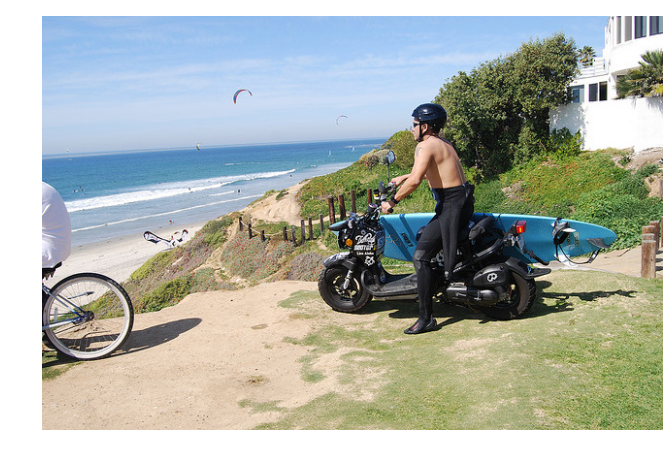

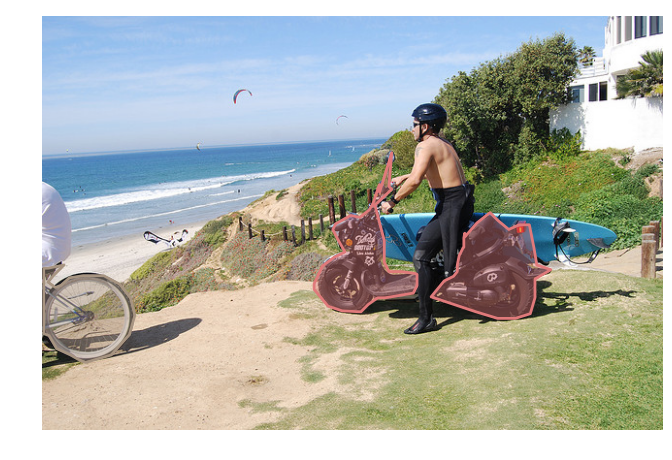

In [6]:
img = coco.loadImgs(myImgIds[np.random.randint(0,len(imgIds))])[0]
annIds = coco.getAnnIds(imgIds=[img['id']], catIds=myCatIds, iscrowd=None)
print(img['file_name'])
print(annIds)
print
annos = coco.loadAnns(annIds)
for anno in annos:
    #print(anno)
    x , y, w, h = anno['bbox']
    print('{} at ({}, {}, {}, {})'.format(cats[anno['category_id']-1]['name'], x, y, x+w, y+h))

# load and display image
I = io.imread('{}/images/{}/{}'.format(dataDir, dataType, img['file_name']))
# use url to load image
# I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()
plt.imshow(I); plt.axis('off')
coco.showAnns(annos)